<a href="https://colab.research.google.com/github/aniketDL/joke_recommendation_engine/blob/master/joke_rating_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Part of the Analytics Vidhya hackathon. Currently 9th in the leaderboard out of 72 participants**

In [0]:
from fastai import *
from fastai.collab import *
import pandas as pd

In [0]:
path = Path('/content')

In [0]:
path.ls()

In [0]:
!unzip train_MaefO4x.zip

In [0]:
traindf = pd.read_csv('train.csv')

In [0]:
testdf = pd.read_csv('test.csv')

In [0]:
traindf.head(1)

,id,user_id,joke_id,Rating
0,31030_110,31030,110,2.75


In [0]:
testdf.head(1)

,id,user_id,joke_id
0,6194_11,6194,11


In [0]:
data = CollabDataBunch.from_df(traindf,path=path,seed=42,valid_pct=0.1,user_name='user_id',item_name='joke_id',rating_name='Rating')

In [0]:
data.show_batch()

user_id,joke_id,target
27508,12,5.438
32296,62,1.188
20590,2,1.844
13152,44,7.844
28085,9,-4.531


In [0]:
testdata = CollabList.from_df(testdf,path=path,cat_names=['id','user_id','joke_id'])

In [0]:
traindf['Rating'].max()

10.0

In [0]:
learn = collab_learner(data, n_factors=40,y_range=(-10,10), wd=1e-01)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


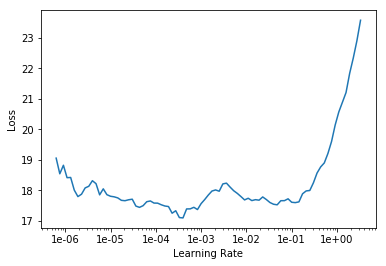

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(5,max_lr=slice(5e-04))

In [0]:
learn.unfreeze()

In [0]:
data.add_test(testdata)

In [0]:
preds,_ = learn.get_preds(DatasetType.Test)

In [0]:
subdf = pd.read_csv('sample_submission_5ms57N3.csv')

In [0]:
labels = [np.round(p).data.item() for p in preds]

In [0]:
subdf.head(1)

,id,Rating
0,6194_11,0


In [0]:
subdf['Rating'] = labels[:]

In [0]:
subdf['Rating'].value_counts()

In [0]:
subdf.to_csv('submission_joke_pred2.csv',index=False)

In [0]:
learn3 = collab_learner(data, use_nn=True, emb_szs={'user_id': 40, 'problem_id':40}, layers=[256, 128], y_range=(-10, 10))

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


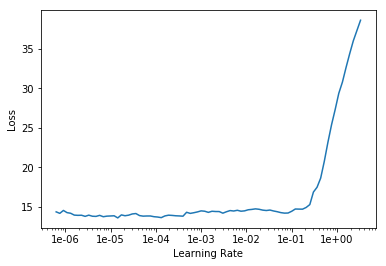

In [0]:
learn3.lr_find()
learn3.recorder.plot()

In [0]:
learn3.fit_one_cycle(5,max_lr=slice(1e-03))

In [0]:
learn3.unfreeze()

In [0]:
preds3,_ = learn3.get_preds(DatasetType.Test)

In [0]:
labels2 = [np.round(p).data.item() for p in preds2]

In [0]:
subdf['Rating'] = labels2[:]

In [0]:
subdf.to_csv('submission_joke_pred4.csv',index=False)